## Task 2

In [46]:
df_second=df.copy()

In [57]:
print('Dataframe shape: '+ format(df_second.shape))
df_second.isna().sum()

Dataframe shape: (149008, 50)


Bearer Id                         429
Start                               0
Start ms                            0
End                                 0
End ms                              0
Dur. (s)                            0
IMSI                                0
MSISDN/Number                       0
IMEI                                0
Last Location Name                589
Avg RTT DL (ms)                     0
Avg RTT UL (ms)                     0
Avg Bearer TP DL (kbps)             0
Avg Bearer TP UL (kbps)             0
DL TP < 50 Kbps (%)                 0
50 Kbps < DL TP < 250 Kbps (%)      0
250 Kbps < DL TP < 1 Mbps (%)       0
DL TP > 1 Mbps (%)                  0
UL TP < 10 Kbps (%)                 0
10 Kbps < UL TP < 50 Kbps (%)       0
Activity Duration DL (ms)           0
Activity Duration UL (ms)           0
Handset Manufacturer                0
Handset Type                        0
Nb of sec with Vol DL < 6250B       0
Nb of sec with Vol UL < 1250B       0
Social Media

### 1

In [58]:
users_metric=df_second.groupby(by='MSISDN/Number').agg({'Bearer Id':'count','Dur. (s)':'sum','Total Data (megabytes)':'sum'})
users_metric.columns=['Number of Sessions','Duration(s)','Total Data(megabytes)']

In [59]:
print("Top 10 customers with most sessions")
users_metric.sort_values(by='Number of Sessions',ascending=False).head(10)

Top 10 customers with most sessions


,Number of Sessions,Duration(s),Total Data(megabytes)
MSISDN/Number,,,
33626320676,18,4314.187575,7971.167261
33625779332,17,2719.119747,8499.620722
33614892860,17,3278.810363,8846.226494
33659725664,16,4035.428000,7705.862783
33675877202,15,3806.576192,7891.110608
33760536639,15,2764.221171,8514.773963
33667163239,13,2502.702767,5618.394054
33604515716,12,3390.981788,5487.855293
33627080969,12,3154.541788,5754.730859


In [60]:
print("Top 10 customers with long sessions")
users_metric.sort_values(by='Duration(s)',ascending=False).head(10)

Top 10 customers with long sessions


,Number of Sessions,Duration(s),Total Data(megabytes)
MSISDN/Number,,,
33626320676,18,4314.187575,7971.167261
33786323068,12,4059.652000,5622.231529
33659725664,16,4035.428000,7705.862783
33675877202,15,3806.576192,7891.110608
33761268199,10,3481.629000,5051.114473
33652131385,8,3393.253000,3038.073726
33604515716,12,3390.981788,5487.855293
33614892860,17,3278.810363,8846.226494
33675588018,8,3164.842000,2819.931163


In [61]:
print("Top 10 customers with large data usage")
users_metric.sort_values(by='Total Data(megabytes)',ascending=False).head(10)

Top 10 customers with large data usage


,Number of Sessions,Duration(s),Total Data(megabytes)
MSISDN/Number,,,
33614892860,17,3278.810363,8846.226494
33760536639,15,2764.221171,8514.773963
33625779332,17,2719.119747,8499.620722
33626320676,18,4314.187575,7971.167261
33675877202,15,3806.576192,7891.110608
33659725664,16,4035.428000,7705.862783
33666464084,11,2401.530384,7308.500938
33760413819,12,2951.633384,7132.370514
33664712899,11,2927.785000,6872.018208


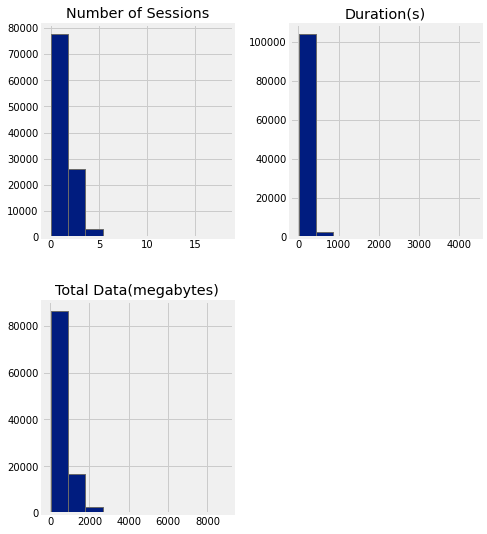

In [62]:
_=users_metric.hist(figsize=(7,9))

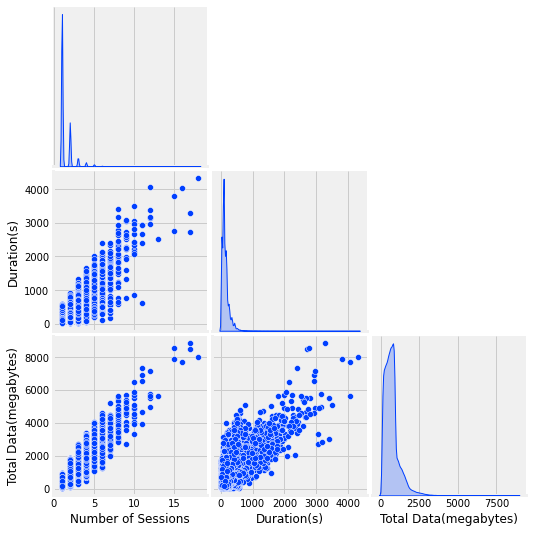

In [225]:
_=sns.pairplot(users_metric,diag_kind='kde',markers=['s'],corner=True)

In [63]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import sys

In [64]:
from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)
    return normalized_data

In [66]:
def make_clusters_summary(df, cluster):
    df_dict = {}
    for n_cluster in range(0, len(cluster.cluster_centers_)):
        cluster_elements = (cluster.labels_ == n_cluster)

        df_use = df[cluster_elements]
        df_dict['cluster ' + str(n_cluster)] = df_use
    return df_dict

## 2

In [67]:
users_metric_scaled=normalizer(users_metric)

In [68]:
kmeans=KMeans(n_clusters=3).fit(users_metric_scaled)

In [69]:
kmeans.inertia_

777.640058299634

In [70]:
clusters=make_clusters_summary(users_metric,kmeans)

In [71]:
print('___Summary Statistics for Cluster 1___')
clusters['cluster 0'].agg(['min','max','sum'])

___Summary Statistics for Cluster 1___


,Number of Sessions,Duration(s),Total Data(megabytes)
min,0,1.375500e+01,4.259776e+01
max,18,4.314188e+03,8.846226e+03
sum,41051,5.991917e+06,1.605318e+07


In [72]:
print('___Summary Statistics for Cluster 2___')
clusters['cluster 1'].agg(['min','max','sum'])

___Summary Statistics for Cluster 2___


,Number of Sessions,Duration(s),Total Data(megabytes)
min,0,7.142000e+00,5.287081e+01
max,11,8.875920e+02,5.096129e+03
sum,96830,7.352512e+06,5.579503e+07


In [73]:
print('___Summary Statistics for Cluster 3___')
clusters['cluster 2'].agg(['min','max','sum'])

___Summary Statistics for Cluster 3___


,Number of Sessions,Duration(s),Total Data(megabytes)
min,0,3.837100e+01,3.324901e+01
max,12,4.059652e+03,5.622232e+03
sum,10698,1.943136e+06,2.022271e+06


## 3

In [75]:
users_and_apps=df_second.groupby(by='MSISDN/Number').agg({'Social Media Total (megabytes)': 'sum',
                                                          'Email Total (megabytes)': 'sum',
                                                          'Google Total (megabytes)': 'sum',
                                                          'Youtube Total (megabytes)': 'sum',
                                                          'Netflix Total (megabytes)': 'sum',
                                                          'Gaming Total (megabytes)': 'sum'})

In [76]:
def findtopten(df,sort_col):
    try:
        df_sorted=df.sort_values(by=sort_col,ascending=False)[sort_col].head(10)
        
    except:
        print('Enter the right name of the column')
    return df_sorted

In [77]:
findtopten(users_and_apps,'Social Media Total (megabytes)')

MSISDN/Number
33626320676    43.374779
33760536639    39.783189
33659725664    35.412358
33614892860    28.294544
33625779332    27.135500
33667163239    24.247850
33786323068    23.974919
33669068942    23.800834
33603127838    23.077825
33658490784    23.000066
Name: Social Media Total (megabytes), dtype: float64

In [78]:
findtopten(users_and_apps,'Email Total (megabytes)')

MSISDN/Number
33626320676    42.418782
33614892860    40.788634
33625779332    40.633966
33786323068    36.310123
33659725664    35.999792
33760536639    33.693767
33675877202    31.514421
33665460546    30.417885
33667163239    30.335796
33698792269    29.059042
Name: Email Total (megabytes), dtype: float64

In [79]:
findtopten(users_and_apps,'Youtube Total (megabytes)')

MSISDN/Number
33625779332    452.958769
33760536639    396.289198
33614892860    394.370218
33626320676    374.483047
33675877202    317.410572
33667163239    315.231310
33627080969    308.790774
33760413819    303.169107
33698792269    302.661958
33603127838    284.090139
Name: Youtube Total (megabytes), dtype: float64

In [80]:
findtopten(users_and_apps,'Google Total (megabytes)')

MSISDN/Number
33626320676    152.191852
33625779332    142.307915
33614892860    127.973787
33760536639    123.223099
33659725664    116.516345
33786323068    110.254484
33675877202    109.860502
33667163239    105.032696
33761268199     97.089988
33698756430     91.935151
Name: Google Total (megabytes), dtype: float64

In [81]:
findtopten(users_and_apps,'Netflix Total (megabytes)')

MSISDN/Number
33659725664    399.519079
33614892860    361.401046
33625779332    356.980607
33760536639    334.643269
33626320676    328.725740
33760413819    318.347546
33667163239    313.939488
33675877202    309.093159
33786323068    305.939790
33761268199    292.091341
Name: Netflix Total (megabytes), dtype: float64

In [82]:
findtopten(users_and_apps,'Gaming Total (megabytes)')

MSISDN/Number
33614892860    7749.432234
33760536639    7461.045228
33625779332    7326.673487
33675877202    6970.567597
33626320676    6887.572116
33659725664    6725.559211
33666464084    6646.303338
33760413819    6268.619592
33664712899    6103.856008
33698792269    5753.743069
Name: Gaming Total (megabytes), dtype: float64

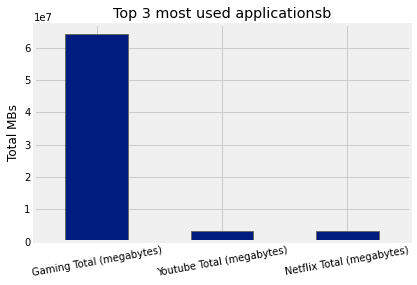

In [83]:
_=users_and_apps.agg('sum').sort_values(ascending=False)[:3].plot(kind='bar',rot=10,ylabel='Total MBs')
_=plt.title('Top 3 most used applicationsb')

In [84]:
def elbow_method(dataframe, min_k, max_k):
    # Try all k's between min_k and max_k
    cluster_nums = range(min_k, max_k + 1)
    
    # Array of K-means algorithm objects
    k_mean_algs = [KMeans(n_clusters = k) for k in cluster_nums]
    
    # Array with the results of the K-mean algorithms
    k_mean_res = [alg.fit(dataframe) for alg in k_mean_algs]
    
    # Array with the centroids for each value of k
    centroids = [res.cluster_centers_ for res in k_mean_res]
    
    # Euclidean distance between the points of the cluster and the centroids
    distances = [cdist(dataframe, centroid, 'euclidean') for centroid in centroids]
    
    # Get the closest centroid (and the corresponding distance)
    min_indices = [np.argmin(distance, axis = 1) for distance in distances]
    min_distances = [np.min(distance, axis = 1) for distance in distances]
    
    # Calculate the average squared distance
    avg_sum_squares = [sum(dist ** 2) / dataframe.shape[0] for dist in min_distances]

    # Plot the elbow graph
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(cluster_nums, avg_sum_squares, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average sum of squares within cluster')
    plt.show()

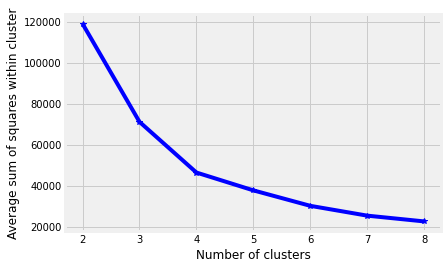

In [86]:
elbow_method(users_metric,2,8)